In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import metrics
import csv

In [6]:
# Load the DataFrame from pickle
df = pd.read_pickle('SFT_dataset_df_max_fitness_unique_designs_from_SA.pkl')
# df['Masked_Sequence'].iloc[0]
# df['Masked_Sequence'].iloc[1]
# df['Masked_Sequence'].iloc[2]

'MAGL<mask><mask><mask>FVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHN<mask>RFLQGEGTDPK<mask>VQKIRDAIKKG<mask>ACSVRLLNYRKDGTPFWNLLTVTPIKTPDGRVSKFVGVQVDVTSKTEGKALA'

In [2]:
# load mutants for kde plot

dir_filepath = './logs/SFT_ESM2_650M_with_SA_data'

# Load mutants from pretrained ESM2 650M
version = 0
fixed_scores_np = np.load(f'{dir_filepath}/version_0/fixed_scores.npy')

####################################### load sft mutants without random masking #######################################

# Load sft mutants
version = 0
dataset_2_no_random_masking_np = np.load(f'{dir_filepath}/version_{version}/sft_scores.npy')

# Load sft mutants
version = 20
dataset_3_no_random_masking_np = np.load(f'{dir_filepath}/version_{version}/sft_esm2_t33_650M_UR50D_scores.npy')

# Load sft mutants
version = 21
dataset_4_no_random_masking_np = np.load(f'{dir_filepath}/version_{version}/sft_esm2_t33_650M_UR50D_scores.npy')

# Load sft mutants
version = 3
dataset_5_no_random_masking_np = np.load(f'{dir_filepath}/version_{version}_best/sft_scores.npy')

####################################### load sft mutants with random masking #######################################

# Load sft mutants
version = 4
dataset_2_w_random_masking_np = np.load(f'{dir_filepath}/version_{version}/sft_scores.npy')

# Load sft mutants
version = 18
dataset_3_w_random_masking_np = np.load(f'{dir_filepath}/version_{version}/sft_esm2_t33_650M_UR50D_scores.npy')

# Load sft mutants
version = 23
dataset_4_w_random_masking_np = np.load(f'{dir_filepath}/version_{version}/sft_esm2_t33_650M_UR50D_scores.npy')

# Load sft mutants
version = 22
dataset_5_w_random_masking_np = np.load(f'{dir_filepath}/version_{version}/sft_esm2_t33_650M_UR50D_scores.npy')

####################################### load sft mutants with DMS dataset #######################################

# Load sft mutants from DMS
version = 11
dataset_DMS_no_random_masking_np = np.load(f'{dir_filepath}/version_{version}/sft_esm2_t33_650M_UR50D_scores.npy')


In [3]:
# Constants for the mean and standard deviation
predicted_log_mean_wt_score = 4.1498 # this is predicted WT score # mean log exp score: 4.094413241


In [4]:
alpha = 0.5


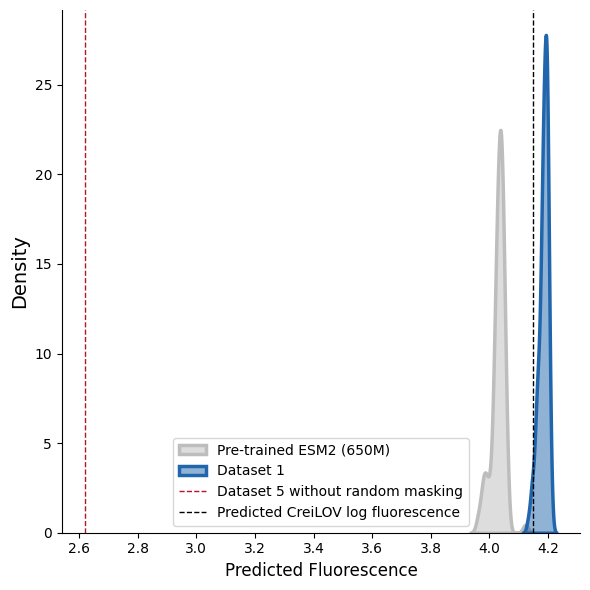

In [5]:
# Plot histogram
fig, ax = plt.subplots(figsize=(6, 6))

# Plot histograms for the models7
sns.kdeplot(np.median(fixed_scores_np, axis=0)[0:100],  color='#bdbdbd', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Pre-trained ESM2 (650M)')
sns.kdeplot(np.median(dataset_5_no_random_masking_np, axis=0)[0:100],  color='#2166ac', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Dataset 1')
ax.axvline(np.median(dataset_DMS_no_random_masking_np, axis=0)[0], color='#b2182b', linestyle='--', linewidth=1, label='Dataset 5 without random masking')

ax.axvline(predicted_log_mean_wt_score, color='black', linestyle='--', linewidth=1, label='Predicted CreiLOV log fluorescence')

ax.set_xlabel('Predicted Fluorescence', fontsize=12)
ax.set_ylabel('Density', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlim(3.6, 4.2)
# ax.set_ylim(0, 80)
ax.legend()
plt.tight_layout()

# Save the plot
plt.savefig(f'./figures/synthetic_vs_experimental_design_scores.svg')


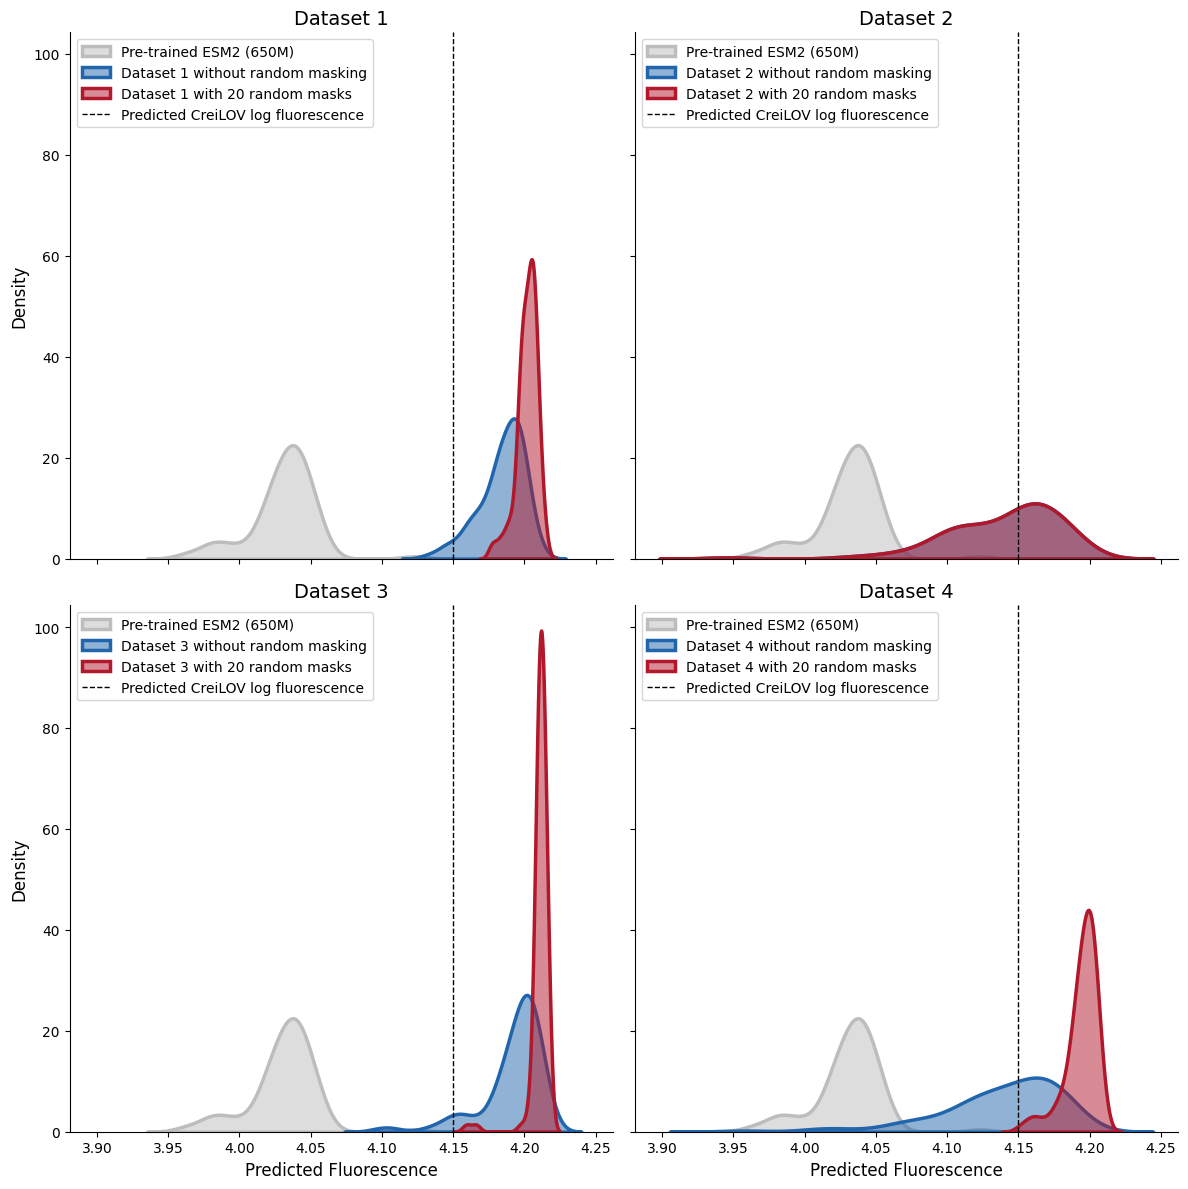

In [6]:
# Define color mapping
color_mapping = {
    'Dataset 1 without random masking': '#2166ac',
    'Dataset 2 without random masking': '#2166ac',
    'Dataset 3 without random masking': '#2166ac',
    'Dataset 4 without random masking': '#2166ac',
    'Dataset 1 with random masking': '#b2182b',
    'Dataset 2 with random masking': '#b2182b',
    'Dataset 3 with random masking': '#b2182b',
    'Dataset 4 with random masking': '#b2182b'
}

# Create a 2x2 figure layout
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)
axes = axes.flatten()

datasets = [
    (dataset_5_no_random_masking_np, dataset_5_w_random_masking_np, 'Dataset 1'),
    (dataset_2_no_random_masking_np, dataset_2_w_random_masking_np, 'Dataset 2'),
    (dataset_4_no_random_masking_np, dataset_4_w_random_masking_np, 'Dataset 3'),
    (dataset_3_no_random_masking_np, dataset_3_w_random_masking_np, 'Dataset 4')
]

# Plot each dataset in its respective subplot
for i, (no_masking, with_masking, title) in enumerate(datasets):
    ax = axes[i]
    
    # Plot Pre-trained ESM2 (650M) on all subplots
    sns.kdeplot(np.median(fixed_scores_np, axis=0)[0:100],  color='#bdbdbd', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Pre-trained ESM2 (650M)')
    
    # Plot dataset without and with random masking using color mapping
    sns.kdeplot(np.median(no_masking, axis=0)[0:100],  color=color_mapping[f'{title} without random masking'], ax=ax, linewidth=2.5, fill=True, alpha=alpha, label=f'{title} without random masking')
    sns.kdeplot(np.median(with_masking, axis=0)[0:100],  color=color_mapping[f'{title} with random masking'], ax=ax, linewidth=2.5, fill=True, alpha=alpha, label=f'{title} with 20 random masks')
    
    # Vertical line for predicted log mean WT score
    ax.axvline(predicted_log_mean_wt_score, color='black', linestyle='--', linewidth=1, label='Predicted CreiLOV log fluorescence')
    
    ax.set_title(title, fontsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Predicted Fluorescence', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.legend()

plt.tight_layout()

# Save the figure
plt.savefig('./figures/random_masking_design_scores.svg')
plt.show()

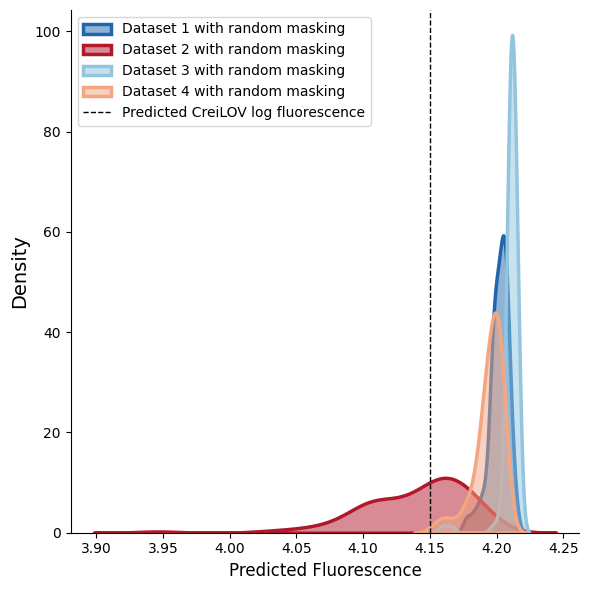

In [7]:
# Plot histogram
fig, ax = plt.subplots(figsize=(6, 6))

# Plot histograms for the models
sns.kdeplot(np.median(dataset_5_w_random_masking_np, axis=0)[0:100], color='#2166ac', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Dataset 1 with random masking')
sns.kdeplot(np.median(dataset_2_w_random_masking_np, axis=0)[0:100], color='#b2182b', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Dataset 2 with random masking')
sns.kdeplot(np.median(dataset_4_w_random_masking_np, axis=0)[0:100], color='#92c5de', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Dataset 3 with random masking')
sns.kdeplot(np.median(dataset_3_w_random_masking_np, axis=0)[0:100], color='#f4a582', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Dataset 4 with random masking')

ax.axvline(predicted_log_mean_wt_score, color='black', linestyle='--', linewidth=1, label='Predicted CreiLOV log fluorescence')

ax.set_xlabel('Predicted Fluorescence', fontsize=12)
ax.set_ylabel('Density', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlim(3.6, 4.2)
# ax.set_ylim(0, 80)
ax.legend()
plt.tight_layout()

# Save the plot
plt.savefig(f'./figures/synthetic_size_with_random_masking_design_scores.svg')


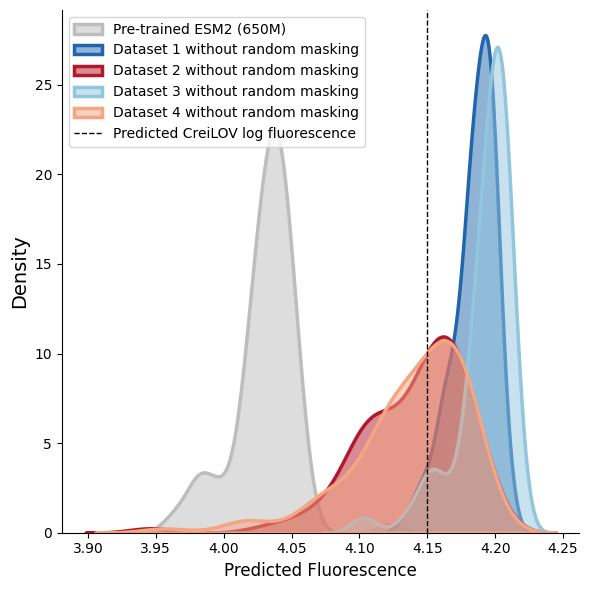

In [10]:
# Plot histogram
fig, ax = plt.subplots(figsize=(6, 6))

# Plot histograms for the models
sns.kdeplot(np.median(fixed_scores_np, axis=0)[0:100],  color='#bdbdbd', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Pre-trained ESM2 (650M)')
sns.kdeplot(np.median(dataset_5_no_random_masking_np, axis=0)[0:100], color='#2166ac', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Dataset 1 without random masking')
sns.kdeplot(np.median(dataset_2_no_random_masking_np, axis=0)[0:100], color='#b2182b', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Dataset 2 without random masking')
sns.kdeplot(np.median(dataset_4_no_random_masking_np, axis=0)[0:100], color='#92c5de', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Dataset 3 without random masking')
sns.kdeplot(np.median(dataset_3_no_random_masking_np, axis=0)[0:100], color='#f4a582', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Dataset 4 without random masking')

ax.axvline(predicted_log_mean_wt_score, color='black', linestyle='--', linewidth=1, label='Predicted CreiLOV log fluorescence')

ax.set_xlabel('Predicted Fluorescence', fontsize=12)
ax.set_ylabel('Density', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlim(3.6, 4.2)
# ax.set_ylim(0, 80)
ax.legend()
plt.tight_layout()

# Save the plot
plt.savefig(f'./figures/synthetic_size_no_random_masking_design_scores.svg')


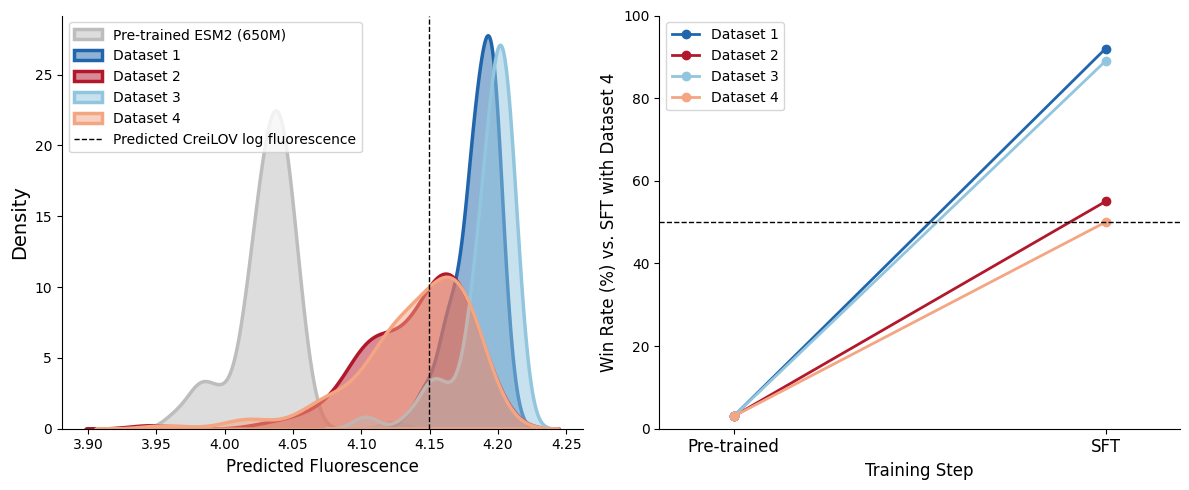

In [35]:
# ---------------------------
# Create figure and subplots
# ---------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 1]})

# ====================================================
# Subplot 1: KDE of dataset medians
# ====================================================
sns.kdeplot(np.median(fixed_scores_np, axis=0)[:100], color='#bdbdbd', ax=ax1,
            linewidth=2.5, fill=True, alpha=alpha, label='Pre-trained ESM2 (650M)')
sns.kdeplot(np.median(dataset_5_no_random_masking_np, axis=0)[:100], color='#2166ac', ax=ax1,
            linewidth=2.5, fill=True, alpha=alpha, label='Dataset 1')
sns.kdeplot(np.median(dataset_2_no_random_masking_np, axis=0)[:100], color='#b2182b', ax=ax1,
            linewidth=2.5, fill=True, alpha=alpha, label='Dataset 2')
sns.kdeplot(np.median(dataset_4_no_random_masking_np, axis=0)[:100], color='#92c5de', ax=ax1,
            linewidth=2.5, fill=True, alpha=alpha, label='Dataset 3')
sns.kdeplot(np.median(dataset_3_no_random_masking_np, axis=0)[:100], color='#f4a582', ax=ax1,
            linewidth=2.5, fill=True, alpha=alpha, label='Dataset 4')

ax1.axvline(predicted_log_mean_wt_score, color='black', linestyle='--',
            linewidth=1, label='Predicted CreiLOV log fluorescence')

ax1.set_xlabel('Predicted Fluorescence', fontsize=12)
ax1.set_ylabel('Density', fontsize=14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(fontsize=10)

# ====================================================
# Subplot 2: Win Rate – Pre-trained vs. SFT (lineplot)
# ====================================================
datasets = {
    'Dataset 1': {'Pre-trained': fixed_scores_np, 'SFT': dataset_5_no_random_masking_np},
    'Dataset 2': {'Pre-trained': fixed_scores_np, 'SFT': dataset_2_no_random_masking_np},
    'Dataset 3': {'Pre-trained': fixed_scores_np, 'SFT': dataset_4_no_random_masking_np},
    'Dataset 4': {'Pre-trained': fixed_scores_np, 'SFT': dataset_3_no_random_masking_np}, # use dataset_3_no_random_masking_np as baseline
}
colors = {
    'Dataset 1': '#2166ac',
    'Dataset 2': '#b2182b',
    'Dataset 3': '#92c5de',
    'Dataset 4': '#f4a582',
}
# --- Set new global baseline ---
baseline_scores = np.median(dataset_3_no_random_masking_np, axis=0)[:100]  # New baseline for win rate

# --- Compute win rates vs. dataset_3_no_random_masking_np baseline ---
rows = []
for dataset_label, model_data in datasets.items():
    for model_name, score_array in model_data.items():
        if dataset_label == 'Dataset 4' and model_name == "SFT":
            win_rate = 50
            rows.append({'Dataset': dataset_label, 'Model': model_name, 'Value': win_rate})
        else:
            model_scores = np.median(score_array, axis=0)[:100]
            win_rate = 100 * np.mean(model_scores > baseline_scores)
            rows.append({'Dataset': dataset_label, 'Model': model_name, 'Value': win_rate})

df_wr = pd.DataFrame(rows)

# --- Encode x positions ---
x_positions = {'Pre-trained': 0, 'SFT': 1}
df_wr['x'] = df_wr['Model'].map(x_positions)
df_wr['Color'] = df_wr['Dataset'].map(colors)

# --- Plot connected win rate lines for each dataset ---
for dataset_label, subdf in df_wr.groupby('Dataset'):
    subdf = subdf.sort_values('x')
    ax2.plot(subdf['x'], subdf['Value'], marker='o', linewidth=2,
             label=dataset_label, color=colors[dataset_label])

# --- Horizontal 50% baseline ---
baseline_handle = ax2.axhline(50, color='black', linestyle='--', linewidth=1)

# --- Formatting ---
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Pre-trained', 'SFT'], fontsize=12)
ax2.set_xlabel('Training Step', fontsize=12)
ax2.set_ylabel('Win Rate (%) vs. SFT with Dataset 4', fontsize=12)
ax2.set_ylim(0, 100)
ax2.set_xlim(-0.2, 1.2)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# --- Legend ---
ax2.legend()

# ====================================================
# Finalize
# ====================================================
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('./figures/synthetic_dataset_kde_and_winrate_lineplot.svg')
plt.savefig('./figures/synthetic_dataset_kde_and_winrate_lineplot.png')
plt.show()
